# Visualize samples for NGC 4047 in galactocentric radius and angle.

In [1]:
import matplotlib.pyplot as plt
import edge_pydb
from edge_pydb import EdgeTable
from edge_pydb.conversion import gc_polr
import numpy as np
from astropy import units as u

## List the available tables

In [2]:
# Package location, where the _config.json file lives
print(edge_pydb.__path__)

['/Users/tonywong/Library/Python/3.6/lib/python/site-packages/edge_pydb']


In [3]:
# Get a listing of all files
EdgeTable('list')

Choose from the following files to read:
cospec_smo7.csv
edgealma_hispectra.csv
edge_hispectra.csv
NGC4047.pipe3d.hdf5
edge.pipe3d.hdf5
edge.cocube_smo7.hdf5
NGC4047.cocube_smo7.hdf5
edge_bbpars_smo7.csv
edge_rfpars.csv
edge_hiflux.csv
edge_bbpars_natv.csv
edge_coflux_natv.csv
edge_coobs_de20.csv
edge_coobs_d20.csv
edge_coobs_e20.csv
edge_coflux_e20.csv
edge_coobs_de10.csv
edge_coflux_smo7.csv
edge_coflux_smo6.csv
edge_wise.csv
edge_nsa.csv
edge_leda_old.csv
edge_ned.csv
edge_rdist.csv
edge_leda.csv
edge_califa.csv
NGC4047.comom_smo7.hdf5
edge.comom_smo7.hdf5
rprof_de20_smo.csv
rprof_smo7_smo.csv
bb_smo7_fixvd_dilmsk_freepa.csv
bb_smo5_fixvd_bbmsk_freepa.csv
bb_smo7_fixvd_dilmsk.csv
bb_natv_fitvd_dilmsk.csv
bb_natv_fixvd_dilmsk_freepa.csv
bb_natv_fitvd_bbmsk_freepa.csv
bb_smo7_fitvd_dilmsk.csv
bb_natv_fixvd_dilmsk.csv
bb_smo7_fixvd_bbmsk_freepa.csv
bb_smo5_fitvd_bbmsk.csv
bb_natv_fitvd_dilmsk_freepa.csv
bb_smo7_fitvd_dilmsk_freepa.csv
bb_smo5_fixvd_bbmsk.csv
bb_smo5_fixvd_dilmsk.csv
bb

<EdgeTable length=0>
<No columns>

## Read the observational values

In [4]:
# Here we forget to specify the path for an HDF5 file so it gives us a list of options
cotab = EdgeTable('NGC4047.comom_smo7.hdf5')

Columns in NGC4047.comom_smo7.hdf5 :
 ['dil', 'dil.__table_column_meta__', 'smo', 'smo.__table_column_meta__']


In [5]:
# Image data (mom0 image)
cotab = EdgeTable('NGC4047.comom_smo7.hdf5', path='smo')
cotab

Name,ix,iy,ra_off,dec_off,rad_arc,azi_ang,emom0max,mom0,emom0,sigmol,e_sigmol
,,,deg,deg,arcsec,deg,K km / s,K km / s,K km / s,solMass / pc2,solMass / pc2
bytes10,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32
NGC4047,2,2,0.032773,-0.021671,124.534,43.345,nan,nan,nan,nan,nan
NGC4047,2,5,0.032773,-0.020838,121.456,42.146,nan,nan,nan,nan,nan
NGC4047,2,8,0.032774,-0.020005,118.433,40.886,nan,nan,nan,nan,nan
NGC4047,2,11,0.032774,-0.019171,115.471,39.560,nan,nan,nan,nan,nan
NGC4047,2,14,0.032775,-0.018338,112.574,38.165,nan,nan,nan,nan,nan
NGC4047,2,17,0.032775,-0.017505,109.746,36.698,nan,nan,nan,nan,nan
NGC4047,2,20,0.032776,-0.016671,106.995,35.154,nan,nan,nan,nan,nan
NGC4047,2,23,0.032776,-0.015838,104.326,33.530,nan,nan,nan,nan,nan


In [6]:
# For calculating radius we need CARMA reference position
ctrpos = EdgeTable('edge_coflux_smo7.csv', cols=['Name', 'coRactr_smo7', 'coDectr_smo7'])
cotab.join(ctrpos)

In [7]:
# Ctr pos, PA, Inc from LEDA.  Note that RA is given in hours not degrees.
leda  = EdgeTable('edge_leda.csv', cols=['Name', 'ledaRA', 'ledaDE', 'ledaPA', 'ledaIncl'])
leda['ledaRA'].convert_unit_to('deg')
cotab.join(leda)

In [8]:
# PA, Inc, and ctr pos from Becca's table.  Note that RA is given in hours not degrees.
rftab  = EdgeTable('edge_rfpars.csv', cols=['Name', 'rfPA', 'rfInc', 'rfKinRA', 'rfKinDecl'])
rftab['rfKinRA'].convert_unit_to('deg')
cotab.join(rftab)
cotab

Name,ix,iy,ra_off,dec_off,rad_arc,azi_ang,emom0max,mom0,emom0,sigmol,e_sigmol,coRactr_smo7,coDectr_smo7,ledaRA,ledaDE,ledaPA,ledaIncl,rfPA,rfInc,rfKinRA,rfKinDecl
,,,deg,deg,arcsec,deg,K km / s,K km / s,K km / s,solMass / pc2,solMass / pc2,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg
str13,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
NGC4047,110,14,-0.012606,-0.018334,96.166,100.723,nan,nan,nan,nan,nan,180.7113,48.6362,180.711072,48.6362246,97.77,42.06,104.0,42.1,180.71121089999997,48.6362246
NGC4047,110,20,-0.012606,-0.016667,88.573,102.335,nan,nan,nan,nan,nan,180.7113,48.6362,180.711072,48.6362246,97.77,42.06,104.0,42.1,180.71121089999997,48.6362246
NGC4047,107,155,-0.011354,0.020833,101.091,-112.759,nan,nan,nan,nan,nan,180.7113,48.6362,180.711072,48.6362246,97.77,42.06,104.0,42.1,180.71121089999997,48.6362246
NGC4047,110,23,-0.012606,-0.015834,84.806,103.249,nan,nan,nan,nan,nan,180.7113,48.6362,180.711072,48.6362246,97.77,42.06,104.0,42.1,180.71121089999997,48.6362246
NGC4047,110,29,-0.012607,-0.014167,77.347,105.342,nan,nan,nan,nan,nan,180.7113,48.6362,180.711072,48.6362246,97.77,42.06,104.0,42.1,180.71121089999997,48.6362246
NGC4047,110,32,-0.012607,-0.013334,73.662,106.546,3.5926418,nan,nan,nan,nan,180.7113,48.6362,180.711072,48.6362246,97.77,42.06,104.0,42.1,180.71121089999997,48.6362246
NGC4047,110,35,-0.012607,-0.012501,70.014,107.877,3.3098822,nan,nan,nan,nan,180.7113,48.6362,180.711072,48.6362246,97.77,42.06,104.0,42.1,180.71121089999997,48.6362246
NGC4047,107,17,-0.011345,-0.017501,91.134,99.761,nan,nan,nan,nan,nan,180.7113,48.6362,180.711072,48.6362246,97.77,42.06,104.0,42.1,180.71121089999997,48.6362246


## Re-calculate polar coordinates in galaxy plane.  Use the CARMA coordinates to turn the offsets into absolute positions.  Use Becca's ringfit table for center position, PA and INC.

In [9]:
rarc, azdeg = gc_polr(cotab['coRactr_smo7']+cotab['ra_off'], 
                  cotab['coDectr_smo7']+cotab['dec_off'], 
                  cotab['rfKinRA'], cotab['rfKinDecl'],
                  cotab['rfPA'], cotab['rfInc'])

## Produce the dot plots

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


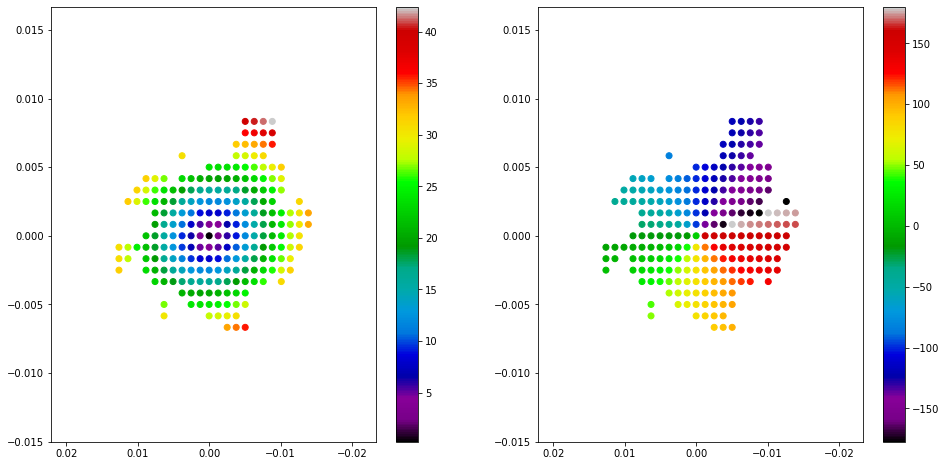

In [10]:
cmap = plt.cm.get_cmap('nipy_spectral')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
sel = (cotab['mom0']>0)
rplt = ax1.scatter(cotab['ra_off'][sel],cotab['dec_off'][sel],c=rarc[sel],cmap=cmap)
ax1.invert_xaxis()
plt.colorbar(rplt,ax=ax1)
tplt = ax2.scatter(cotab['ra_off'][sel],cotab['dec_off'][sel],c=azdeg[sel],cmap=cmap)
ax2.invert_xaxis()
plt.colorbar(tplt,ax=ax2)

## Compare with built-in calculation based on LEDA.

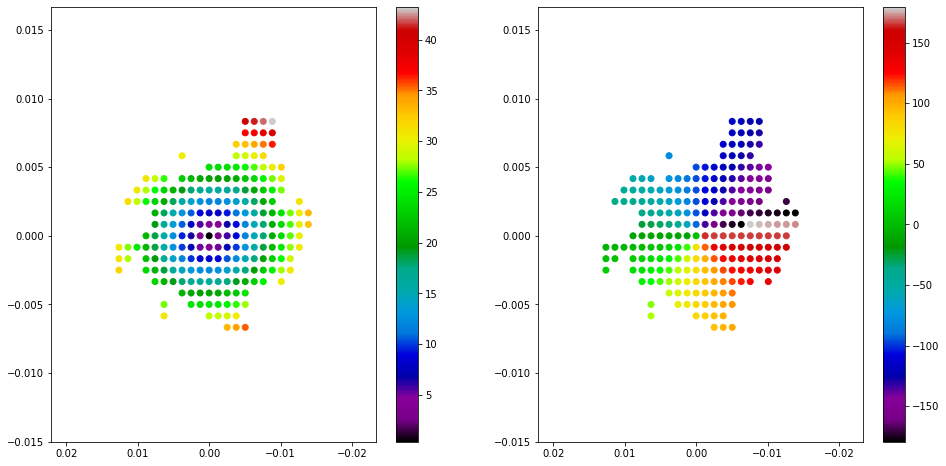

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
sel = (cotab['mom0']>0)
rplt = ax1.scatter(cotab['ra_off'][sel],cotab['dec_off'][sel],c=cotab['rad_arc'][sel],cmap=cmap)
ax1.invert_xaxis()
plt.colorbar(rplt,ax=ax1)
tplt = ax2.scatter(cotab['ra_off'][sel],cotab['dec_off'][sel],c=cotab['azi_ang'][sel],cmap=cmap)
ax2.invert_xaxis()
plt.colorbar(tplt,ax=ax2)

## Compare Becca's values with LEDA.

In [12]:
leda.join(rftab)
leda

Name,ledaRA,ledaDE,ledaPA,ledaIncl,rfPA,rfInc,rfKinRA,rfKinDecl
,deg,deg,deg,deg,deg,deg,deg,deg
str13,float64,float64,float64,float64,float64,float64,float64,float64
ARP220,233.73880049999997,23.5026682,96.46,56.98,337.7,29.7,233.73880049999997,23.5026682
IC0480,118.84663349999998,26.7428168,167.01,90.0,167.9,76.6,118.84618904999998,26.74253902
IC0540,142.54282949999998,7.9025896,170.62,90.0,350.0,68.3,142.54282949999998,7.9025896
IC0944,207.87863849999997,14.0919749,106.48,67.57,105.7,75.0,207.87863849999997,14.0919749
IC1151,239.63476049999997,17.441482,32.1,69.6,203.9,68.0,239.63476049999997,17.441482
IC1199,242.643,10.0400694,158.5,74.75,339.3,64.5,242.64316664999998,10.04037496
IC1683,20.6619165,34.437,171.0,69.03,15.6,54.8,20.6619165,34.437
IC2247,123.99615749999997,23.1996015,149.39,90.0,328.5,77.7,123.99643528499999,23.19932372


Text(0, 0.5, '$\\Delta$DEC [arcsec]')

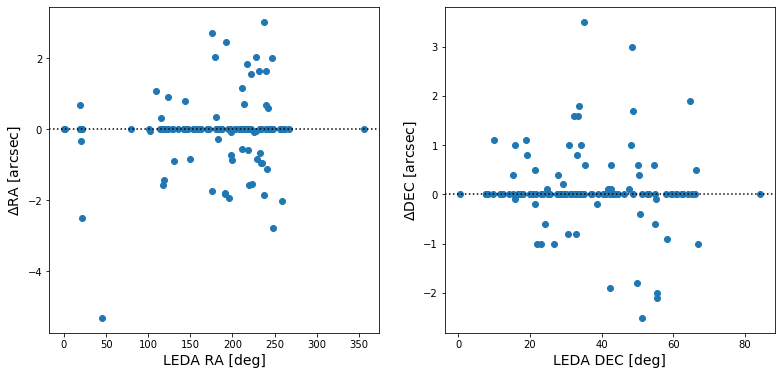

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,6))
ax1.scatter(leda['ledaRA'],(leda['rfKinRA']-leda['ledaRA'])*3600*np.cos(np.radians(leda['ledaDE'])))
ax1.axhline(ls=':', color='k')
ax1.set_xlabel('LEDA RA [deg]',fontsize=14)
ax1.set_ylabel('$\Delta$RA [arcsec]',fontsize=14)
ax2.scatter(leda['ledaDE'],(leda['rfKinDecl']-leda['ledaDE'])*3600)
ax2.axhline(ls=':', color='k')
ax2.set_xlabel('LEDA DEC [deg]',fontsize=14)
ax2.set_ylabel('$\Delta$DEC [arcsec]',fontsize=14)

Text(0, 0.5, 'RINGFIT cos(inc)')

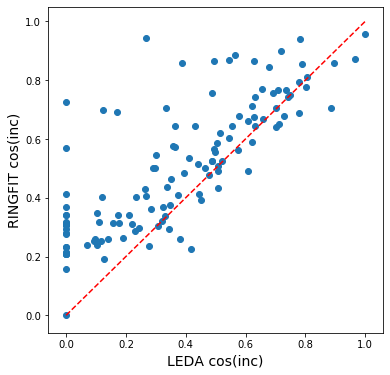

In [14]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(np.cos(np.radians(leda['ledaIncl'])),np.cos(np.radians(leda['rfInc'])))
ax.plot([0,1],[0,1],'r--')
plt.xlabel('LEDA cos(inc)',fontsize=14)
plt.ylabel('RINGFIT cos(inc)',fontsize=14)

Text(0, 0.5, 'RINGFIT PA [deg]')

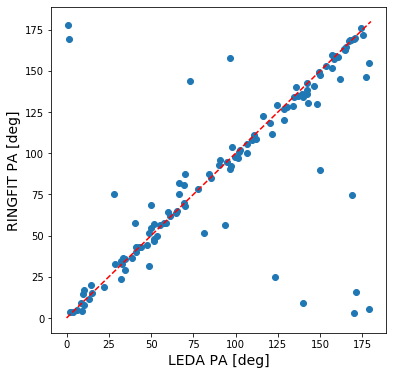

In [15]:
leda['rfPA'][leda['rfPA'] >= 180] -= 180
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(leda['ledaPA'],leda['rfPA'])
ax.plot([0,180],[0,180],'r--')
plt.xlabel('LEDA PA [deg]',fontsize=14)
plt.ylabel('RINGFIT PA [deg]',fontsize=14)